
**Semana 8: Data Analysis with Python (IBM) Módulo 5**

**Nombre: Alexis Hernández Martínez**

**Matrícula: A01016308**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Dra. María de la Paz Rico**

**Fecha: Jueves 3 Noviembre 2022**


**Parte 1: Notebooks del Módulo 5**

In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
#Importación de dataset
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
df = pd.read_csv(path)
df.to_csv(path)

#Uso de datos numéricos solamente

df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
#Importación de librerías para gráficar

from ipywidgets import interact, interactive, fixed, interact_manual

In [5]:
#Definición de función para graficar

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data - Datos de entrenamiento 
    #testing data - Datos de prueba
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [7]:
# Se definen las variables de entrada
x_data=df.drop('price',axis=1)
x_data

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,10.217391,0,1
197,197,197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,12.368421,0,1
198,198,198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,13.055556,0,1
199,199,199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,9.038462,1,0


In [8]:
#Se define la variable de salid
y_data = df['price']
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [9]:
#y se hace la partición de los datos

from sklearn.model_selection import train_test_split

                                                                      #conjunto de prueba 10%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [10]:
#PREGUNTA 1: Question #1): Use the function "train_test_split" to split up the dataset such that 40% 
#of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. 
#The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.40, random_state=0)


#Se imprimen los valores

print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [11]:
#Se crea el objeto de Regresión Lineal
lre=LinearRegression()

#y en base a 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [12]:
#Se calcula R^2 de prueba

lre.score(x_test[['horsepower']], y_test)

0.36358755750788274

In [13]:
#Se calcula R^2 de entrenamiento
lre.score(x_train[['horsepower']], y_train)

#Y se puede ver que es menor la del conjunto de prueba

0.6619724197515104

In [14]:
#PREGUNTA 2: Find the R^2 on the test data using 40% of the dataset for testing.
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [15]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
#con 'horsepower' y 'y_data'
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [16]:
#Se calcula/imprime el promedio y la desviación estándar
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.5220099150421195 and the standard deviation is 0.2911839444756025


In [17]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014929,
       17561927.72247588])

In [18]:
#PREGUNTA 3: Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print('R^2', Rcross2)
print('The mean of the folds are', Rcross2.mean())

R^2 [0.59015621 0.44319613]
The mean of the folds are 0.5166761697127429


In [19]:
#Con horsepower

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [20]:
#PARTE 2: OVERFITTING, UNDERFITTING AND MODEL SELECTION
#Se crean objetos de Regresión Lineal Múltiple
# con 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg' 

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [21]:
#Se hace la predicción con los datos de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [22]:
#Se hace la predicción con los datos de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

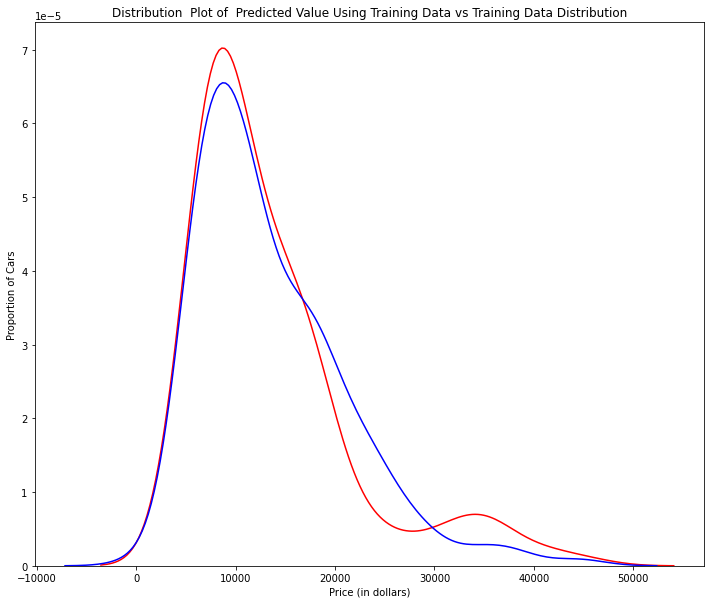

In [23]:
#Se hace la evaluación a través de la gráfica

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

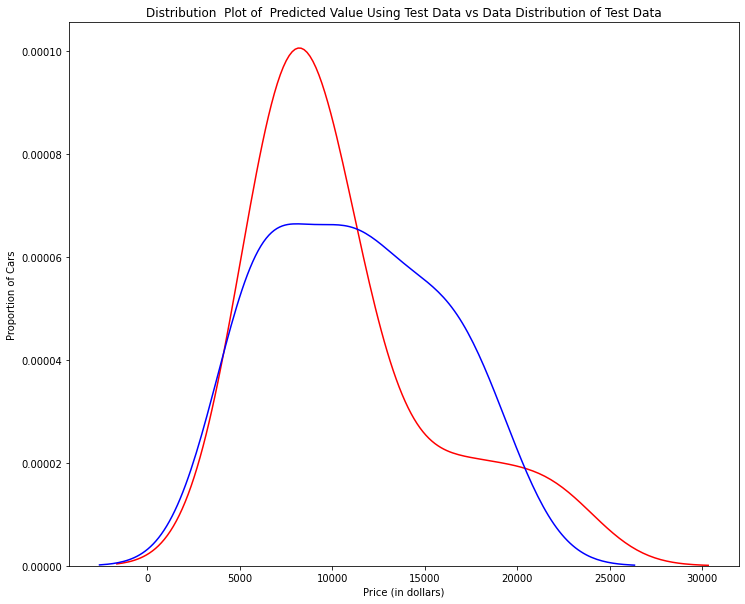

In [24]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [25]:
#Se hace una nueva partición de los datos
#con 55% para entrenamiento y el resto de prueba

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [26]:
#Se crea un polinomio grado 5
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [27]:
#Se crea el modelo de Regresión Lineal y se entrena
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [28]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.75021272,  7308.07521482, 12213.82613379, 18893.10515877,
       19995.78509908])

In [29]:
#Se hace la comparacion de los valores predecidos vs reales
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.75021272  7308.07521482 12213.82613379 18893.10515877]
True values: [ 6295. 10698. 13860. 13499.]


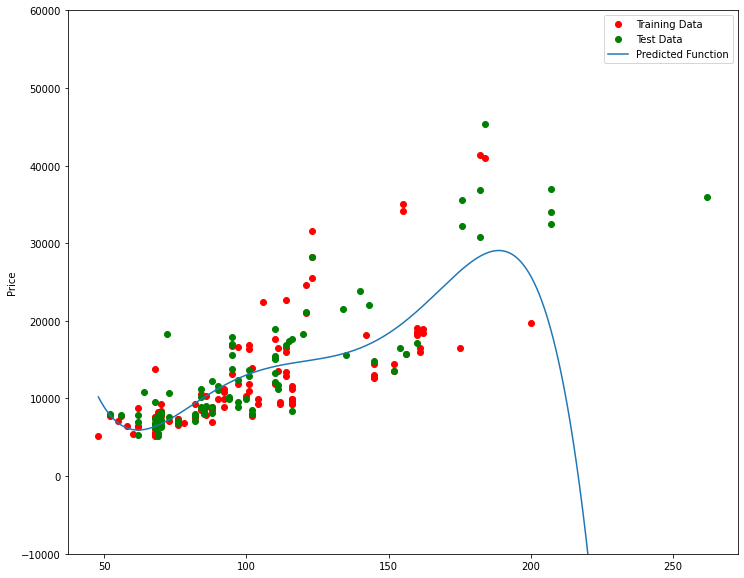

In [30]:
#Se grafica

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [31]:
#Se calcula el R2 de los datos de entrenamiento y de prueba
print(poly.score(x_train_pr, y_train))
print(poly.score(x_test_pr, y_test)) # Como es negativo se 
#es senal de sobre entrenamiento

0.5567716901486633
-29.87164796439341


Text(3, 0.75, 'Maximum R^2 ')

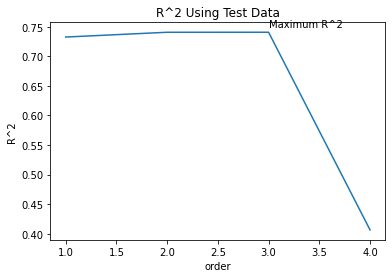

In [32]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [33]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [34]:
#Función interactiva para jugar con el grado
#de los polinomios y la cantidad de datos

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [35]:
#PREGUNTA 4A: We can perform polynomial transformations with more than one feature. 
#Create a "PolynomialFeatures" object "pr1" of degree two.

#PREGUNTA 4B: Transform the training and testing samples for the features 'horsepower', 
#'curb-weight', 'engine-size' and 'highway-mpg'. 
#Hint: use the method "fit_transform".

pr1 = PolynomialFeatures(degree=2) 
x_train_pr1 = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
x_test_pr1 = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
pr1

PolynomialFeatures()

In [36]:
#PREGUNTA 4C: How many dimensions does the new feature have? 
#Hint: use the attribute "shape".

x_train_pr1.shape


(110, 70)

In [37]:
#PREGUNTA 4D: Create a linear regression model "poly1". 
#Train the object using the method "fit" using the polynomial 
#features.

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
/var/folders/jw/5crs62pj0kb669l7dnxt2mkw0000gn/T/ipykernel_1745/3864891997.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

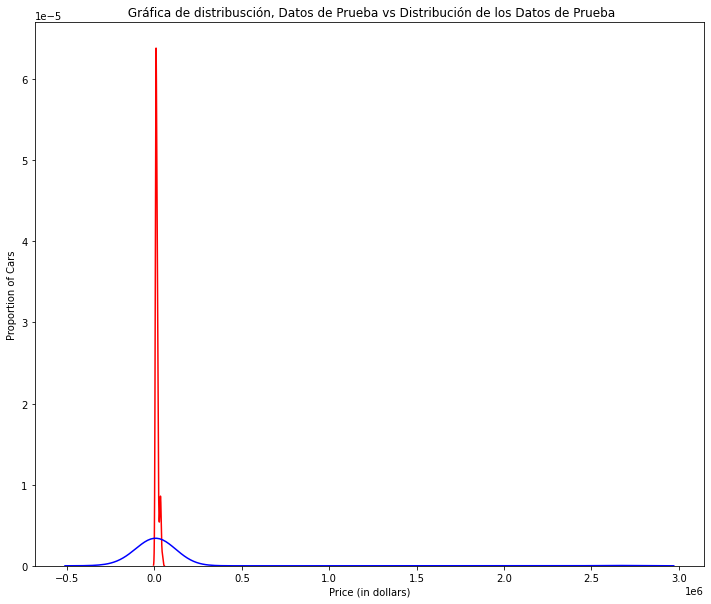

In [38]:
#PREGUNTA 4E: Use the method "predict" to predict an output on the polynomial features, 
#then use the function "DistributionPlot" to display the distribution of the 
#predicted test output vs. the actual test data.

yhat_test1=poly1.predict(x_test_pr1)

Title=' Gráfica de distribusción, Datos de Prueba vs Distribución de los Datos de Prueba'
DistributionPlot(y_test, yhat_test1, "Valor Actual (Test)", "Valor Predecido (Test)", Title)

In [39]:
#PARTE 3: RIDGE REGRESSION

#Se hace una transformación de datos a un polinomio de grado 2:

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [40]:
#Regresión del objeto de Ridge con alhpa =1
RigeModel=Ridge(alpha=1)

In [41]:
#Fit del modelo
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [42]:
#Se obtiene la predicción

yhat = RigeModel.predict(x_test_pr)

In [43]:
#Se imprimen los valores
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [44]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█| 1000/1000 [00:00<00:00, 1065.25it/s, Test Score=0.564, Train Score=0.859


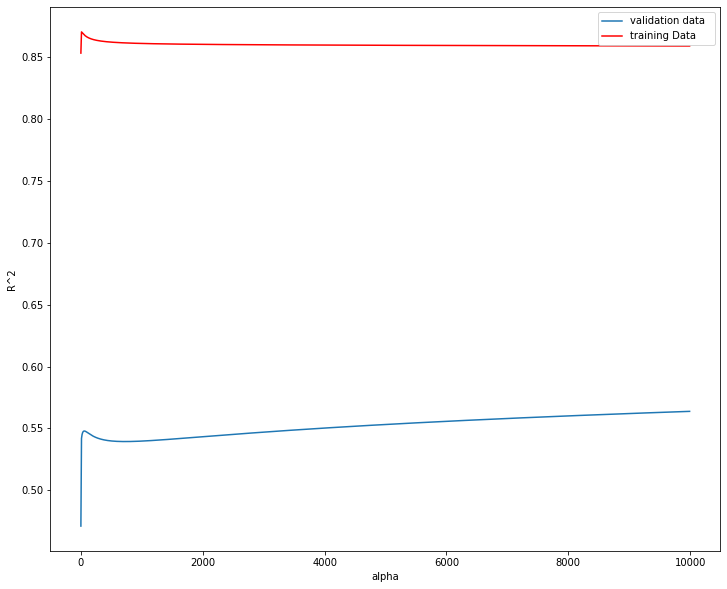

In [45]:
#Gráfico para diferentes valores de alpha

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [46]:
#PREGUNTA 5: Perform Ridge regression. Calculate the R^2 using the polynomial features, 
#use the training data to train the model and use the test data to test the model. 
#The parameter alpha should be set to 10.

RigeModel2=Ridge(alpha=10)
RigeModel2.fit(x_train_pr, y_train)
RigeModel2.score(x_test_pr, y_test)

0.5418576440206572

In [47]:
#Se crea el diccionario con vario valores par alpha
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [48]:
#Objeto

RR=Ridge()
RR

Ridge()

In [49]:
#Y se hace la búsqueda del mejor alpha

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [50]:
#Fit del modelo 
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [51]:
#Se encuentra el mejor alpha
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [52]:
#Validación

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

**Parte 2: Graded Review Questions**

Se anexa screenshot de la realización del Graded Review Questions para el Módulo 5 del curso Data Analysis with Python

**De igual forma se anexa link al badge**

https://www.credly.com/badges/cb0d3d27-fa84-4955-b494-1284fab27237

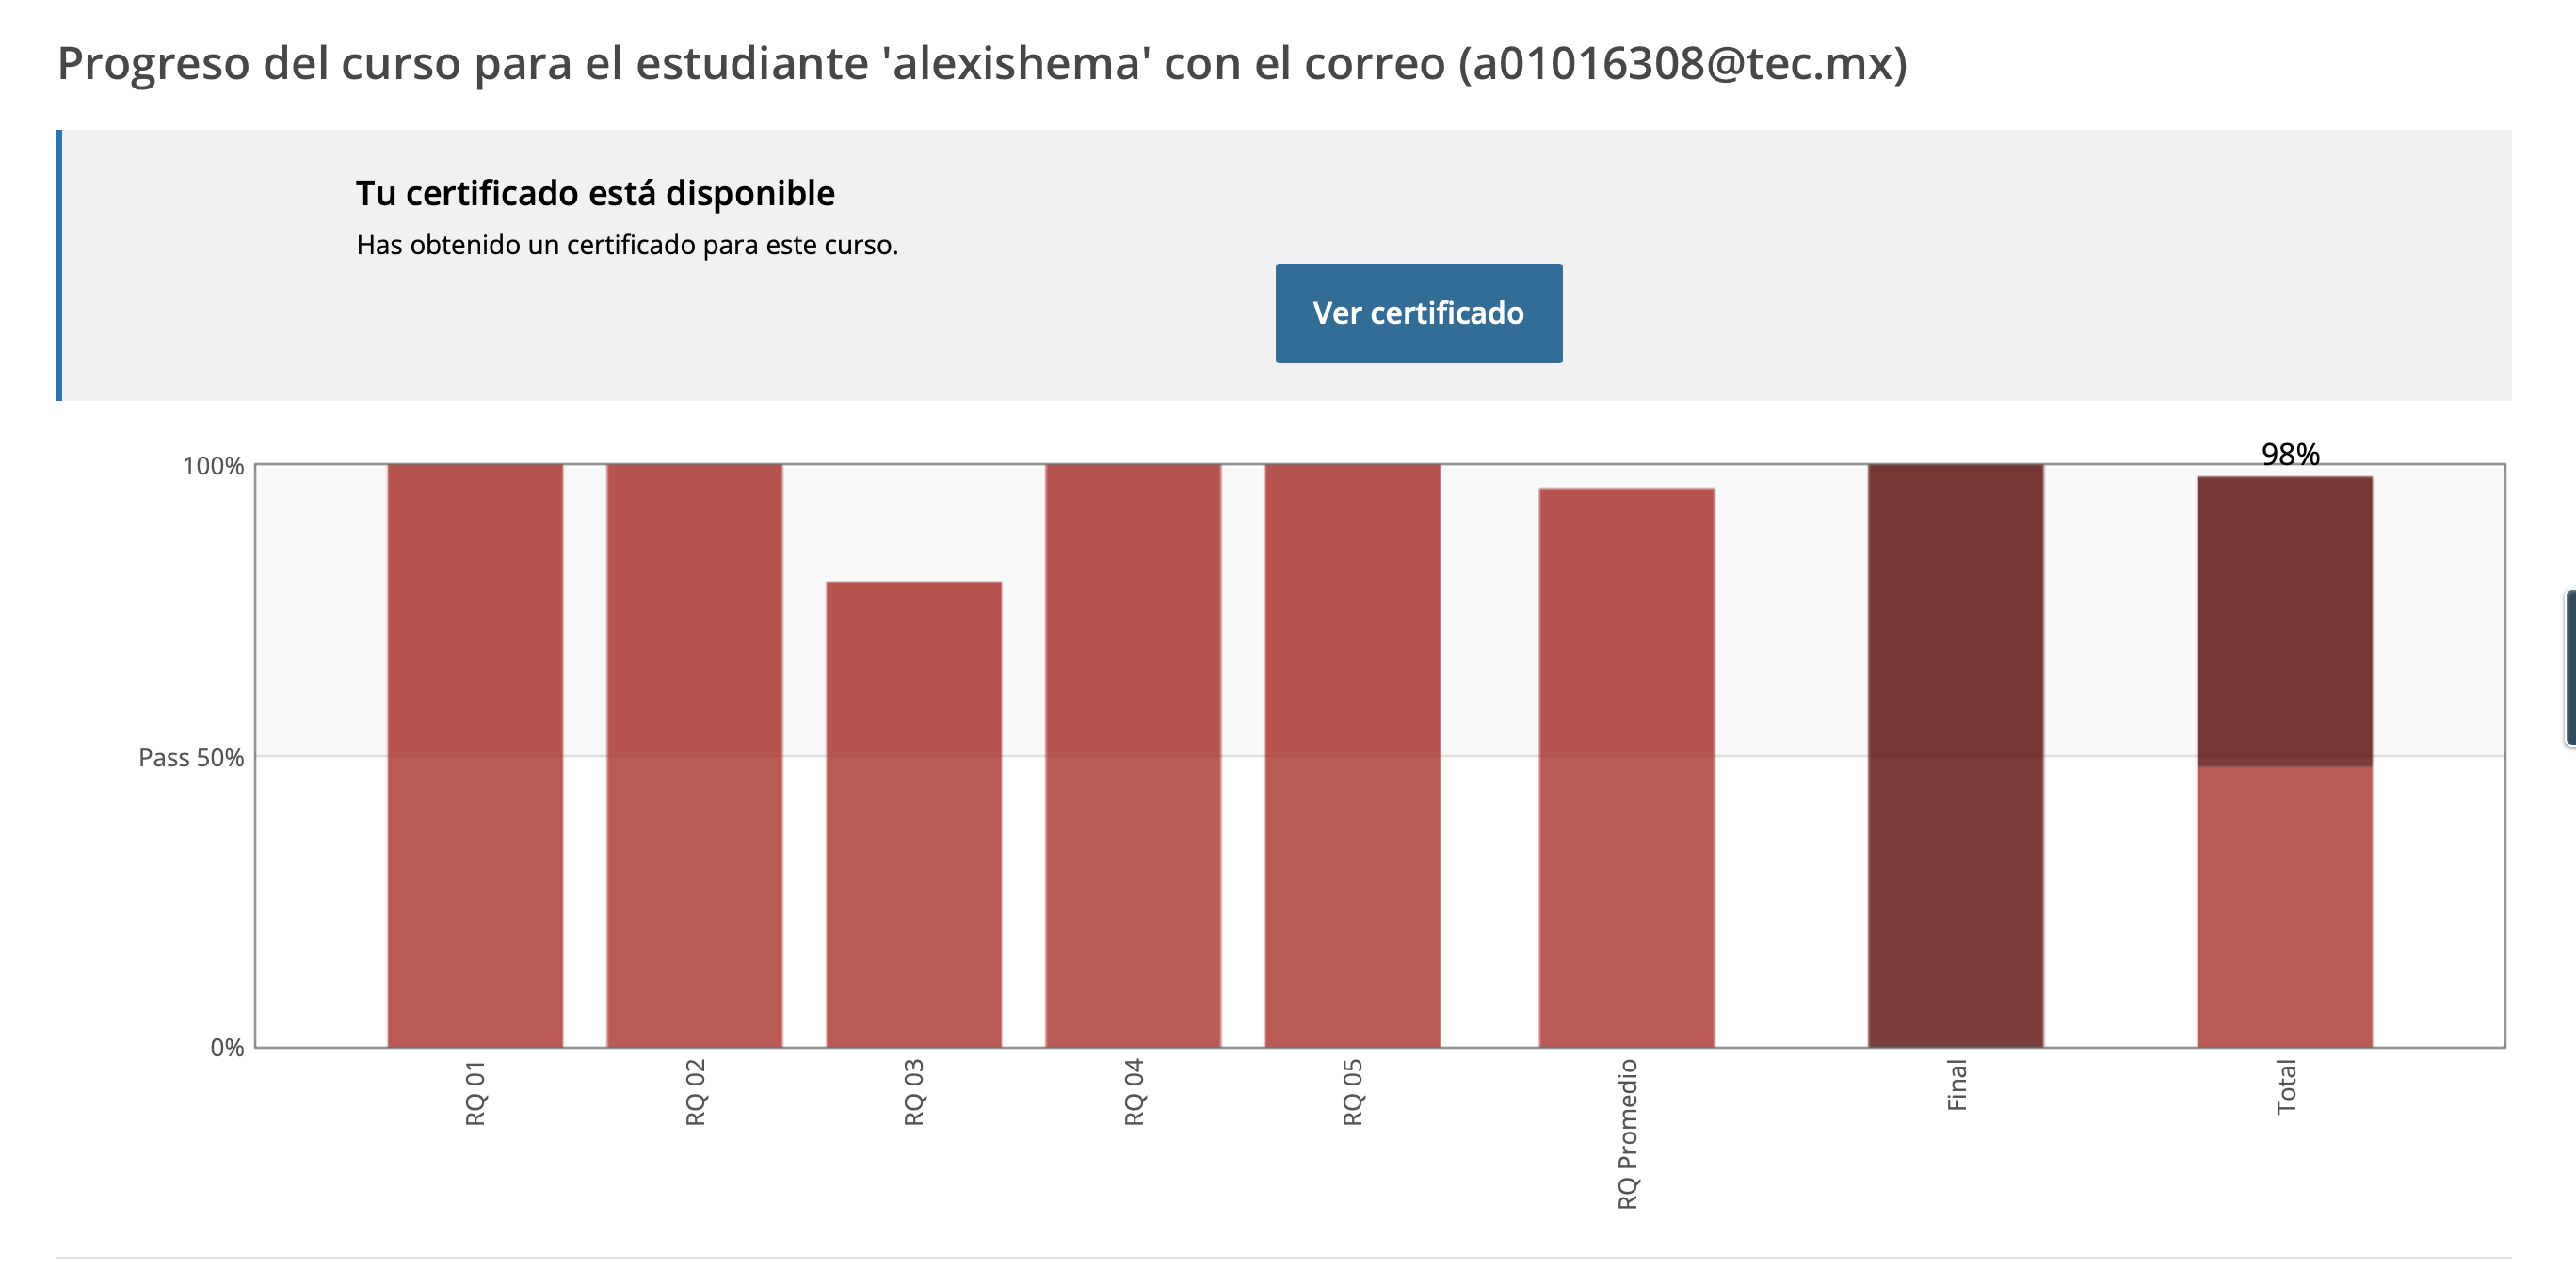